In [1]:
import os
import cv2
import sys
from matplotlib import pyplot as plt
PROJECT_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.join(PROJECT_DIR))
sys.path.append(os.path.join(PROJECT_DIR, "text_importation"))
sys.path.append(os.path.join(PROJECT_DIR, "ocr"))
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
os.getcwd()
print(sys.path)

['/scratch/students/zzhao/code/ajmc/ocr/run', '/scratch/students/zzhao/anaconda3/envs/sp/lib/python38.zip', '/scratch/students/zzhao/anaconda3/envs/sp/lib/python3.8', '/scratch/students/zzhao/anaconda3/envs/sp/lib/python3.8/lib-dynload', '', '/scratch/students/zzhao/anaconda3/envs/sp/lib/python3.8/site-packages', '/home/zzhao/.local/lib/python3.8/site-packages', '/scratch/students/zzhao/code/ajmc', '/scratch/students/zzhao/code/ajmc/text_importation', '/scratch/students/zzhao/code/ajmc/ocr']


In [22]:
from run_tesseract import PROJECT_DIR, PARENT_DIR, RAW_COMMENTARY_DIRS, TRAIN_COMMENTARY_DIRS, TESSDATA_DIR, TESSDATA_BEST_DIR, POGRETRA_COMMENTARY_DIRS
from run_tesseract import get_fig_name, test_ocr, train, get_fig_idxs, show_fig, batch_ocr, train, clean_data_tesstrain, check_missing_gt, clean_gt_folder, test_ocr_raw, evaluate_model, check_dataset_size
from preprocess import toolbox

In [4]:
dir_map = {
    "raw": RAW_COMMENTARY_DIRS,
    "train": TRAIN_COMMENTARY_DIRS,
    "pogretra": sorted(POGRETRA_COMMENTARY_DIRS),
}

for dataset_id in dir_map:
    print(dataset_id)
    print(dir_map[dataset_id])


raw
['Wecklein1894', 'Kamerbeek1953', 'sophoclesplaysa05campgoog', 'Paduano1982', 'lestragdiesdeso00tourgoog', 'Untersteiner1934', 'Ferrari1974', 'sophokle1v3soph', 'DeRomilly1976', 'Finglass2011', 'Colonna1975', 'bsb10234118', 'cu31924087948174', 'Garvie1998']
train
['Wecklein1894', 'sophoclesplaysa05campgoog', 'bsb10234118', 'sophokle1v3soph', 'cu31924087948174']
pogretra
['German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux', 'German-serifs/actaphilippietac00bonnuoft', 'German-serifs/b21459162_0003', 'German-serifs/bsb10234118', 'German-serifs/bub_gb_FZbfaq7tcvAC', 'German-serifs/churchfathers', 'German-serifs/ldpd_10922736_000', 'German-serifs/platonisdialogi06plat', 'German-serifs/stoicorumveterum02arniuoft', 'Old-Teubner-serif/602250676brucerob', 'Old-Teubner-serif/Teubner-serif-training', 'Old-Teubner-serif/aeschinisoration00aesc', 'Old-Teubner-serif/deanimaliumantur02aeliuoft', 'Old-Teubner-serif/inplatonisrempu02krolgoog_teubner_serif', 'Old-Teubner-serif/poet

In [5]:
mode="pogretra" # choose from 'train' and 'raw' and 'pogretra'
commentary_name = dir_map[mode][0]
cleaned_suffix="clean-threshold"
print(commentary_name)

German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux


In [6]:
avail_figs = get_fig_idxs(commentary_name, mode=mode, cleaned_suffix=cleaned_suffix, verbose=True)

Total img count: 593
too many images. only showing the first 100 and last 100.
['nnc1.50178386-1593613693_0010_0.png', 'nnc1.50178386-1593613693_0010_1.png', 'nnc1.50178386-1593613693_0010_10.png', 'nnc1.50178386-1593613693_0010_11.png', 'nnc1.50178386-1593613693_0010_12.png', 'nnc1.50178386-1593613693_0010_13.png', 'nnc1.50178386-1593613693_0010_14.png', 'nnc1.50178386-1593613693_0010_15.png', 'nnc1.50178386-1593613693_0010_16.png', 'nnc1.50178386-1593613693_0010_17.png', 'nnc1.50178386-1593613693_0010_18.png', 'nnc1.50178386-1593613693_0010_19.png', 'nnc1.50178386-1593613693_0010_20.png', 'nnc1.50178386-1593613693_0010_21.png', 'nnc1.50178386-1593613693_0010_22.png', 'nnc1.50178386-1593613693_0010_23.png', 'nnc1.50178386-1593613693_0010_24.png', 'nnc1.50178386-1593613693_0010_25.png', 'nnc1.50178386-1593613693_0010_26.png', 'nnc1.50178386-1593613693_0010_3.png', 'nnc1.50178386-1593613693_0010_4.png', 'nnc1.50178386-1593613693_0010_5.png', 'nnc1.50178386-1593613693_0010_6.png', 'nnc1.

In [7]:
fig_idx = avail_figs[258]
print(fig_idx)
fig_name = get_fig_name(commentary_name, fig_idx, mode=mode, cleaned_suffix=cleaned_suffix)
print(fig_name)

nnc1.50178386-1593613693_0024_6.png
/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux-clean-threshold/nnc1.50178386-1593613693_0024_6.png


### preprocessing

Pogretra
- German-serifs/actaphilippietac00bonnuoft/actaphilippietac00bonnuoft_0019_28.png
- use erosion np.ones((3,3))
- use opening cross_kernel(3)

### finetuning

Train
- bsb10234118/bsb10234118_0042_32.png
- use "eng+fra+finetune-grc-pogretra" vs "eng+fra+grc"

### challenge

Bad preprocessing: Pogretra
- German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux/nnc1.50178386-1593613693_0024_5.png
- use erosion np.ones((3,3))
- use opening cross_kernel(3)

In [8]:
img = show_fig(commentary_name, fig_idx, mode=mode, cleaned_suffix=cleaned_suffix)

In [9]:
noise_img = toolbox.add_noise(img, "gaussian", show_fig=True)

In [10]:
preprocessed_img = toolbox.preprocess_img(img)
for tmp_img in preprocessed_img:
    plt.figure()
    plt.imshow(tmp_img[1], cmap='gray')
    # plt.title(tmp_img[0])
    plt.axis("off")

In [17]:
out1 = test_ocr_raw("original", TESSDATA_BEST_DIR, fig_name, img=img, img_suffix="original", lang="eng+fra+grc", save=True, viz=False, verbose=True)

OCR output: 3 " \ ~ - > ’ T 3 , » ~ 5
ἐπεὶ τὰ πρωτεῖα τοῖς ἐν πλανῃ sow ἀποδίδοται, καρ σωφρονῶσιν.

string output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/original/nnc1.50178386-1593613693_0024_6_original.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/original/nnc1.50178386-1593613693_0024_6_original.hocr


In [25]:
out2 = test_ocr_raw("original-finetune", TESSDATA_BEST_DIR, fig_name, img=img, img_suffix="original_finetune", lang="eng+fra+finetune-grc-pogretra", save=True, viz=False, verbose=True)

OCR output: 3 * \ ~ - > ’ T 3 , » ~ 5
ἐπεὶ τὰ πρωτεῖα τοῖς ἐν πλάνῃ sow ἀποδίδοται, κἂν σωφρονῶσιν.

string output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/original-finetune/nnc1.50178386-1593613693_0024_6_original_finetune.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/original-finetune/nnc1.50178386-1593613693_0024_6_original_finetune.hocr


In [26]:
out5 = test_ocr_raw("preprocessing", TESSDATA_BEST_DIR, fig_name="preprocessed", img=preprocessed_img[-1][1], img_suffix="preprocessed", lang="eng+fra+grc", save=True, viz=False, verbose=True)

OCR output: ἐπεὶ τὰ «ρωτεῖα vois ἐν πλάνῃ sow ἀποδίδοται, κἂν σωφρονῶσιν. !

string output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/preprocessing/preprocessed_preprocessed.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/preprocessing/preprocessed_preprocessed.hocr


In [28]:
out6 = test_ocr_raw("preprocessing", TESSDATA_BEST_DIR, fig_name="preprocessed", img=preprocessed_img[-1][1], img_suffix="preprocess_finetuned", lang="eng+fra+grc+finetune-grc-pogretra", save=True, viz=False, verbose=True)

OCR output: ἐπεὶ τὰ «ρωτεῖα vois ἐν πλάνῃ sow ἀποδίδοται, κἂν σωφρονῶσιν. !

string output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/preprocessing/preprocessed_preprocess_finetuned.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/preprocessing/preprocessed_preprocess_finetuned.hocr


In [32]:
out3 = test_ocr_raw("noise", TESSDATA_BEST_DIR, fig_name="noise", img=noise_img, img_suffix="noise", lang="eng+fra+grc", save=True, viz=False, verbose=True)

OCR output: a.

y A oh, FER Ne me SE ἐφ το τ δν LA y τ ARE on Lf &
ἐπεὶ τὰ πρωτεῖα τοῖς ἐν mlawy sow ἀποδίδοται, κἂν


string output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/noise/noise_noise.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/noise/noise_noise.hocr


In [54]:
out4 = test_ocr_raw("noise-finetune", TESSDATA_BEST_DIR, noise_img, "noise_img", lang="eng+fra+finetune-grc-pogretra", save=True, viz=False)

string output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/12-04-2022_13-49-32_noise-finetune/noise_img.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/12-04-2022_13-49-32_noise-finetune/noise_img.hocr
OCR output:



OCR output: 3 " \ - - > ’ T 3 , » ~ 5
ἐπεὶ τὰ πρωτεῖα τοῖς ἐν πλανῃ sow ἀποδίδοται, καρ σωφρονῶσιν.

string output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/04-05-2022_19-42-50_test/nnc1.50178386-1593613693_0024_6.str
hocr output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/04-05-2022_19-42-50_test/nnc1.50178386-1593613693_0024_6.hocr


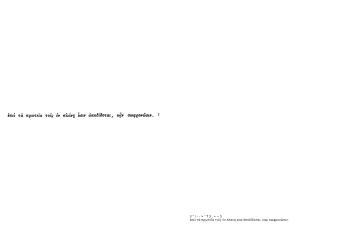

'3 " \\ - - > ’ T 3 , » ~ 5\nἐπεὶ τὰ πρωτεῖα τοῖς ἐν πλανῃ sow ἀποδίδοται, καρ σωφρονῶσιν.\n'

In [33]:
test_ocr("test", TESSDATA_DIR, commentary_name, fig_idx, lang="eng+fra+grc", mode=mode, save=True, cleaned_suffix=cleaned_suffix)

In [13]:
batch_ocr("test", TESSDATA_DIR, commentary_name, "eng+fra+grc", mode=mode, save=True, viz=False, verbose=False, cleaned_suffix=cleaned_suffix)

100%|██████████| 524/524 [1:27:37<00:00, 10.03s/it]


In [12]:
train("finetune-grc-pogretra", POGRETRA_COMMENTARY_DIRS, mode, TESSDATA_BEST_DIR, config_file=os.path.join(PROJECT_DIR, "ocr", "tesstrain_configs", "finetune.yaml"), cleaned_suffix="")

See /scratch/students/zzhao/code/ts/tesstrain/log-08-04-2022_02-28-15.txt for the training output.
make training MODEL_NAME=finetune-grc-pogretra DATA_DIR=/scratch/students/zzhao/code/ts/tessdata_best GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/ldpd_10922736_000 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/platonisdialogi06plat GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/actaphilippietac00bonnuoft GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/bsb10234118 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/stoicorumveterum02arniuoft GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/bub_gb_FZbfaq7tcvAC GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/

tee: 'standard output': No space left on device


In [ ]:
# remove .box and .lstmf files from the dataset
clean_data_tesstrain(commentary_name, mode="train", cleaned_suffix="clean")

In [ ]:
# check if there is any bad ground truth files inside the dataset
check_missing_gt(commentary_name, mode="train", cleaned_suffix="")

In [ ]:
# create a new dataset and only include files with valid ground truth
clean_gt_folder(commentary_name, mode="train")

In [19]:
finetune_suffix = "clean-threshold"
train(
    f"finetune-grc-pogretra-{finetune_suffix}", 
    POGRETRA_COMMENTARY_DIRS, 
    mode, 
    TESSDATA_BEST_DIR, 
    config_file=os.path.join(PROJECT_DIR, "ocr", "tesstrain_configs", "finetune.yaml"), 
    cleaned_suffix=finetune_suffix)

See /scratch/students/zzhao/code/ts/tesstrain/log-29-04-2022_12-10-30-clean-threshold.txt for the training output.
make training MODEL_NAME=finetune-grc-pogretra-clean-threshold DATA_DIR=/scratch/students/zzhao/code/ts/tessdata_best GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/ldpd_10922736_000-clean-threshold GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux-clean-threshold GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/platonisdialogi06plat-clean-threshold GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/actaphilippietac00bonnuoft-clean-threshold GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/bsb10234118-clean-threshold GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/stoicorumveterum02arniuoft-clean-threshold GROUND_TRUTH_DIR=/scratch/students/z

tee: 'standard output': No space left on device


In [32]:
finetune_suffix = "clean-googletrans-resize-20"
train(
    f"finetune-grc-pogretra-{finetune_suffix}-v3", 
    POGRETRA_COMMENTARY_DIRS, 
    mode, 
    TESSDATA_BEST_DIR, 
    config_file=os.path.join(PROJECT_DIR, "ocr", "tesstrain_configs", "finetune_v3.yaml"), 
    cleaned_suffix=finetune_suffix)

See /scratch/students/zzhao/code/ts/tesstrain/log-04-05-2022_22-40-53-clean-googletrans-resize-20.txt for the training output.
make training MODEL_NAME=finetune-grc-pogretra-clean-googletrans-resize-20-v3 DATA_DIR=/scratch/students/zzhao/code/ts/tessdata_best GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/ldpd_10922736_000-clean-googletrans-resize-20 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux-clean-googletrans-resize-20 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/platonisdialogi06plat-clean-googletrans-resize-20 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/actaphilippietac00bonnuoft-clean-googletrans-resize-20 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German-serifs/bsb10234118-clean-googletrans-resize-20 GROUND_TRUTH_DIR=/scratch/students/zzhao/code/pogretra-v1.0/Data/German

tee: 'standard output': No space left on device


In [38]:
evaluate_model(["cu31924087948174", "sophokle1v3soph"], 
    TESSDATA_BEST_DIR, 
    # "grc")
    "finetune-grc-pogretra-clean-googletrans-resize-20-v3")

using language: eng+grc+finetune-grc-pogretra-clean-googletrans-resize-20-v3
/scratch/students/zzhao/code/ajmc_eval/cu31924087948174/ocr/groundtruth/images/cu31924087948174_0063.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/04-05-2022_23-08-43_evaluation_finetune-grc-pogretra-clean-googletrans-resize-20-v3/cu31924087948174/cu31924087948174_0063.hocr
/scratch/students/zzhao/code/ajmc_eval/cu31924087948174/ocr/groundtruth/images/cu31924087948174_0107.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/04-05-2022_23-08-43_evaluation_finetune-grc-pogretra-clean-googletrans-resize-20-v3/cu31924087948174/cu31924087948174_0107.hocr
/scratch/students/zzhao/code/ajmc_eval/cu31924087948174/ocr/groundtruth/images/cu31924087948174_0051.png
hocr output saved to /scratch/students/zzhao/code/ajmc/ocr/exps/04-05-2022_23-08-43_evaluation_finetune-grc-pogretra-clean-googletrans-resize-20-v3/cu31924087948174/cu31924087948174_0051.hocr
/scratch/students/zzhao/code/ajm

In [26]:
check_dataset_size(POGRETRA_COMMENTARY_DIRS, mode, cleaned_suffix="clean-threshold")
check_dataset_size(POGRETRA_COMMENTARY_DIRS, mode, cleaned_suffix="clean-googletrans")
check_dataset_size(POGRETRA_COMMENTARY_DIRS, mode, cleaned_suffix="clean-threshold-resize-36")

There are in total 28001 images within datasets: ['German-serifs/ldpd_10922736_000', 'German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux', 'German-serifs/platonisdialogi06plat', 'German-serifs/actaphilippietac00bonnuoft', 'German-serifs/bsb10234118', 'German-serifs/stoicorumveterum02arniuoft', 'German-serifs/bub_gb_FZbfaq7tcvAC', 'German-serifs/churchfathers', 'German-serifs/b21459162_0003', 'Porson/Porson-commentaries', 'Porson/Old-Oxford', 'Porson/Porson', 'Porson/sourcesforgreek02hillgoog', 'Old-Teubner-serif/602250676brucerob', 'Old-Teubner-serif/inplatonisrempu02krolgoog_teubner_serif', 'Old-Teubner-serif/aeschinisoration00aesc', 'Old-Teubner-serif/Teubner-serif-training', 'Old-Teubner-serif/sextiempiriciope12sext07', 'Old-Teubner-serif/deanimaliumantur02aeliuoft', 'Old-Teubner-serif/poetaeminoresgra02gais']
There are in total 27847 images within datasets: ['German-serifs/ldpd_10922736_000', 'German-serifs/OU_ligature_ST_ligature/nnc1.50178386-1593613693-redux', 